In [1]:
import pandas as pd

In [2]:
df = pd.read_excel (r'/Users/sanjanaharikumar/Downloads/Disertation/ScienceDirectJournalsv1.xlsx')


In [3]:
strremoval = 'https://www.sciencedirect.com/journal/'

In [4]:
df

,Content Name,Link,Type,Access Type,Aim & Scope
0,AACE Clinical Case Reports,https://www.sciencedirect.com/journal/aace-cli...,Journal,Open access,\nAACE Clinical Case Reports is an online jour...
1,AASRI Procedia,https://www.sciencedirect.com/journal/aasri-pr...,Journal,Open access,Transferred back to the society as of 2016;
2,Academic Pathology,https://www.sciencedirect.com/journal/academic...,Journal,Open access,Academic Pathology is the official open-access...
3,Academic Pediatrics,https://www.sciencedirect.com/journal/academic...,Journal,Contains open access,"\nAcademic Pediatrics, the official journal of..."
4,Academic Radiology,https://www.sciencedirect.com/journal/academic...,Journal,Contains open access,\nAcademic Radiology publishes original report...
...,...,...,...,...,...
4424,Zeolites,https://www.sciencedirect.com/journal/zeolites,Journal,Contains open access,Incorporated into Microporous and Mesoporous M...
4425,"Zeszyty Naukowe WCO, Letters in Oncology Science",https://www.sciencedirect.com/journal/zeszyty-...,Journal,Not Available,Transferred back to the society as of 2016;
4426,Zoological Journal of the Linnean Society,https://www.sciencedirect.com/journal/zoologic...,Journal,Contains open access,Transferred to Blackwell as of 2001;
4427,Zoologischer Anzeiger,https://www.sciencedirect.com/journal/zoologis...,Journal,Contains open access,Zoologischer Anzeiger - A Journal of Comparati...


In [5]:
df["Link"]=df["Link"].str.replace(strremoval,"")

/var/folders/vw/g1hn25td3yb5n0ck120v64x80000gn/T/ipykernel_2256/3113812831.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Link"]=df["Link"].str.replace(strremoval,"")


In [6]:
df = df['Link']

In [7]:
df

0                            aace-clinical-case-reports
1                                        aasri-procedia
2                                    academic-pathology
3                                   academic-pediatrics
4                                    academic-radiology
                             ...                       
4424                                           zeolites
4425    zeszyty-naukowe-wco-letters-in-oncology-science
4426          zoological-journal-of-the-linnean-society
4427                              zoologischer-anzeiger
4428                                            zoology
Name: Link, Length: 4429, dtype: object

In [8]:
df

0                            aace-clinical-case-reports
1                                        aasri-procedia
2                                    academic-pathology
3                                   academic-pediatrics
4                                    academic-radiology
                             ...                       
4424                                           zeolites
4425    zeszyty-naukowe-wco-letters-in-oncology-science
4426          zoological-journal-of-the-linnean-society
4427                              zoologischer-anzeiger
4428                                            zoology
Name: Link, Length: 4429, dtype: object

In [9]:
len(df)

4429

In [10]:
df

0                            aace-clinical-case-reports
1                                        aasri-procedia
2                                    academic-pathology
3                                   academic-pediatrics
4                                    academic-radiology
                             ...                       
4424                                           zeolites
4425    zeszyty-naukowe-wco-letters-in-oncology-science
4426          zoological-journal-of-the-linnean-society
4427                              zoologischer-anzeiger
4428                                            zoology
Name: Link, Length: 4429, dtype: object

In [11]:
pd.set_option("display.max_colwidth", None)
df.head()

0    aace-clinical-case-reports
1                aasri-procedia
2            academic-pathology
3           academic-pediatrics
4            academic-radiology
Name: Link, dtype: object

import all the necessary packages

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [13]:

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

326
{'there', '‘s', 'am', 'enough', 'mostly', 'yourselves', 'she', 'i', 'they', 'doing', 'seem', 'say', 'along', 'is', 'made', 'mine', 'often', 'our', 'off', 'amount', 'several', 'well', 'us', 'top', 'on', 'that', 'move', 'regarding', 'beside', 'bottom', 'or', 'whole', 'are', 'around', 'before', 'yours', 'yet', 'name', 'at', 'per', 'all', 'quite', '‘ll', 'where', 'itself', 'please', 'being', 'during', 'just', 'below', 'since', 'thereafter', 'fifty', 'we', 'therefore', 'everything', 'anyone', 'eleven', 'part', 'seems', "'re", 'became', 'anyway', 'seeming', 'wherein', 'by', '‘d', "'d", 'first', 'meanwhile', 'their', 'third', 'would', 'such', 'afterwards', 'beyond', 'wherever', 'the', 'toward', 'and', 'least', 'ca', 'this', 're', '’d', 'up', 'may', 'anyhow', 'unless', 'me', 'its', 'twenty', 'others', 'none', 'back', 'latterly', 'some', 'even', 'own', 'ever', 'only', 'himself', 'always', 'with', 'somewhere', 'other', 'done', 'hers', 'used', 'take', "'ve", 'indeed', 'hereafter', 'empty', 'i

In [14]:
import nltk
# nltk.download('wordnet')
# nltk.download('all')
# nltk.download('stopwords')

Data preprocessing. remove the stopwords and punctuation marks

In [15]:

STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in str(text).lower().split() if i not in STOPWORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

In [16]:
document_cleaned

[['aaceclinicalcasereports'],
 ['aasriprocedia'],
 ['academicpathology'],
 ['academicpediatrics'],
 ['academicradiology'],
 ['acccurrentjournalreview'],
 ['accidentanalysisandprevention'],
 ['accidentandemergencynursing'],
 ['accountingforum'],
 ['accountingmanagementandinformationtechnologies'],
 ['accountingorganizationsandsociety'],
 ['achievementsinthelifesciences'],
 ['acogclinicalreview'],
 ['actaagronomicasinica'],
 ['actaanaesthesiologicataiwanica'],
 ['actaastronautica'],
 ['actaautomaticasinica'],
 ['actabiomaterialia'],
 ['actacolombianadecuidadointensivo'],
 ['actacrystallographicasectionecrystallographiccommunications'],
 ['actadeinvestigacionpsicologica'],
 ['actaecologicasinica'],
 ['actageneticasinica'],
 ['actahaematologicapolonica'],
 ['actahistochemica'],
 ['actamaterialia'],
 ['actamathematicascientia'],
 ['actamechanicasolidasinica'],
 ['actametallurgica'],
 ['actametallurgicaetmaterialia'],
 ['actametallurgicasinicaenglishletters'],
 ['actaoecologica'],
 ['actaort

In [17]:
type(STOP_WORDS)

set

In [18]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values.astype('U'))
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

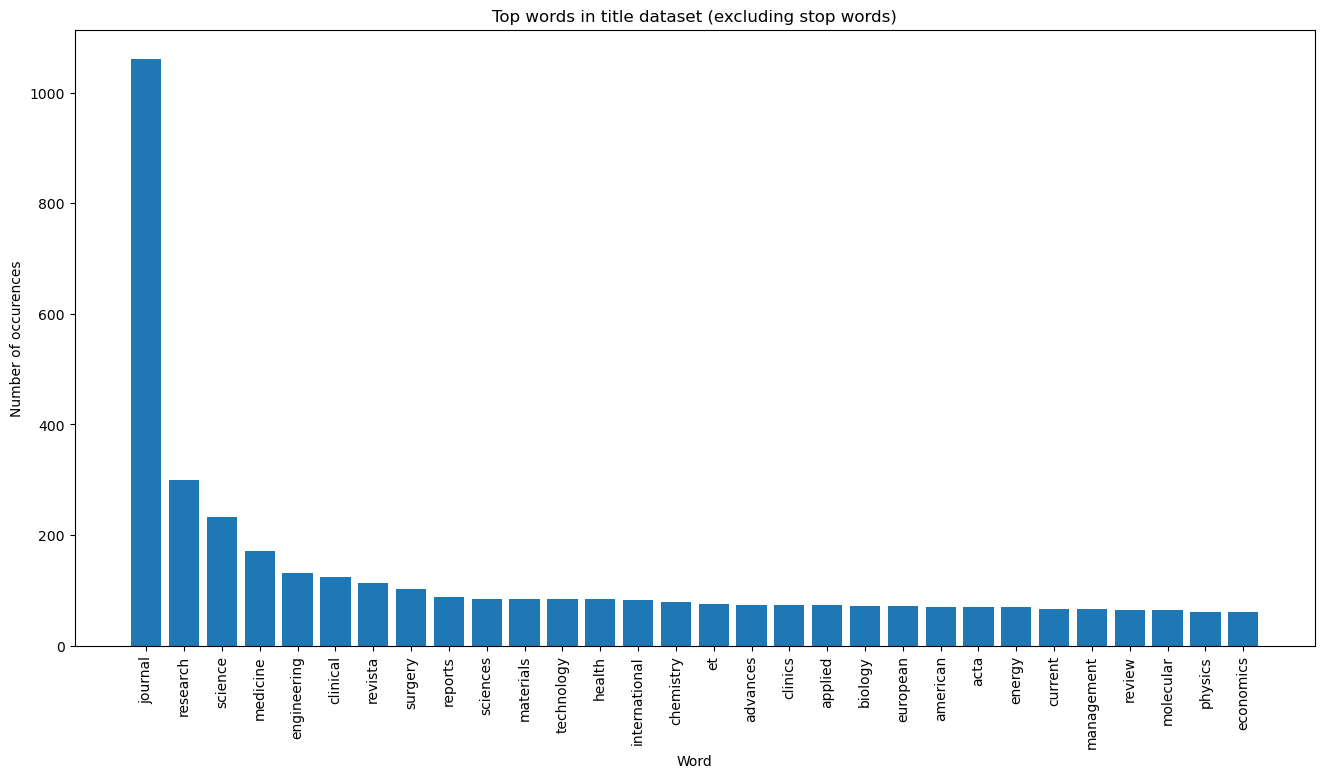

In [19]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=30,count_vectorizer=count_vectorizer,text_data=df)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [20]:
import nltk
#nltk.download('averaged_perceptron_tagger')

In [21]:
tagged_tweet = [TextBlob(str(df[i])).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [22]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per sentence: ', np.mean(word_counts))

Total number of words:  4429
Mean number of words per sentence:  1.0


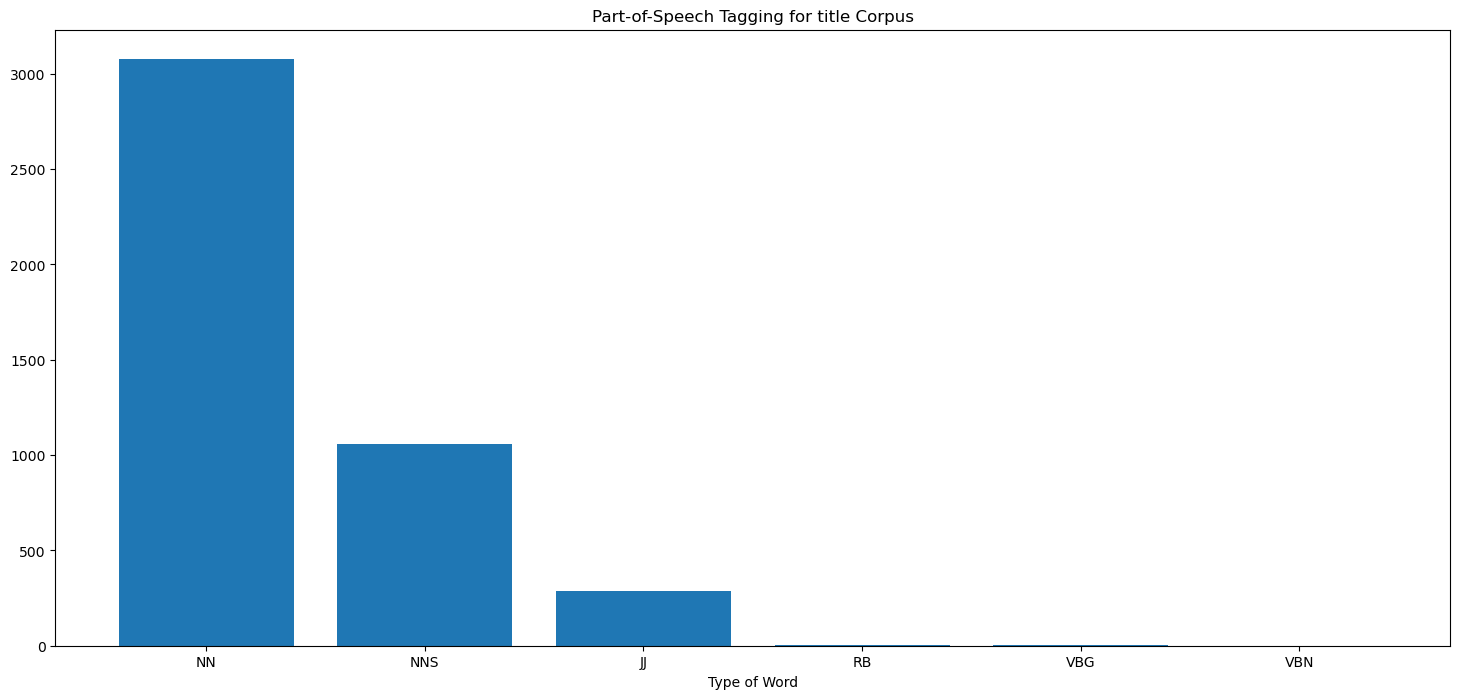

In [23]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [24]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample  = df.copy()
#small_text_sample = df.sample(n=10000, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: aerospace-science-and-technology
Text after vectorization: 
  (0, 2707)	1
  (0, 2498)	1
  (0, 77)	1


5 number of topics are selected

In [25]:
n_topics = 5

LSA model

In [26]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [27]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [28]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [29]:
lsa_keys

[3,
 2,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 4,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 4,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 4,
 4,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 4,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 3,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 0,
 1,
 4,
 2,
 4,
 3,
 1,
 4,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 1,
 1,
 4,
 4,
 0,
 1,
 0,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [30]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [31]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  journal american european sciences chemistry surgery management research science medicine
Topic 2:  research current applied advances environmental practice communications brain opinion environment
Topic 3:  science engineering materials technology review energy international computer letters physics
Topic 4:  medicine clinical clinics reports surgery health biology seminars north america
Topic 5:  revista et acta emc english molecular edition revue espanola reviews


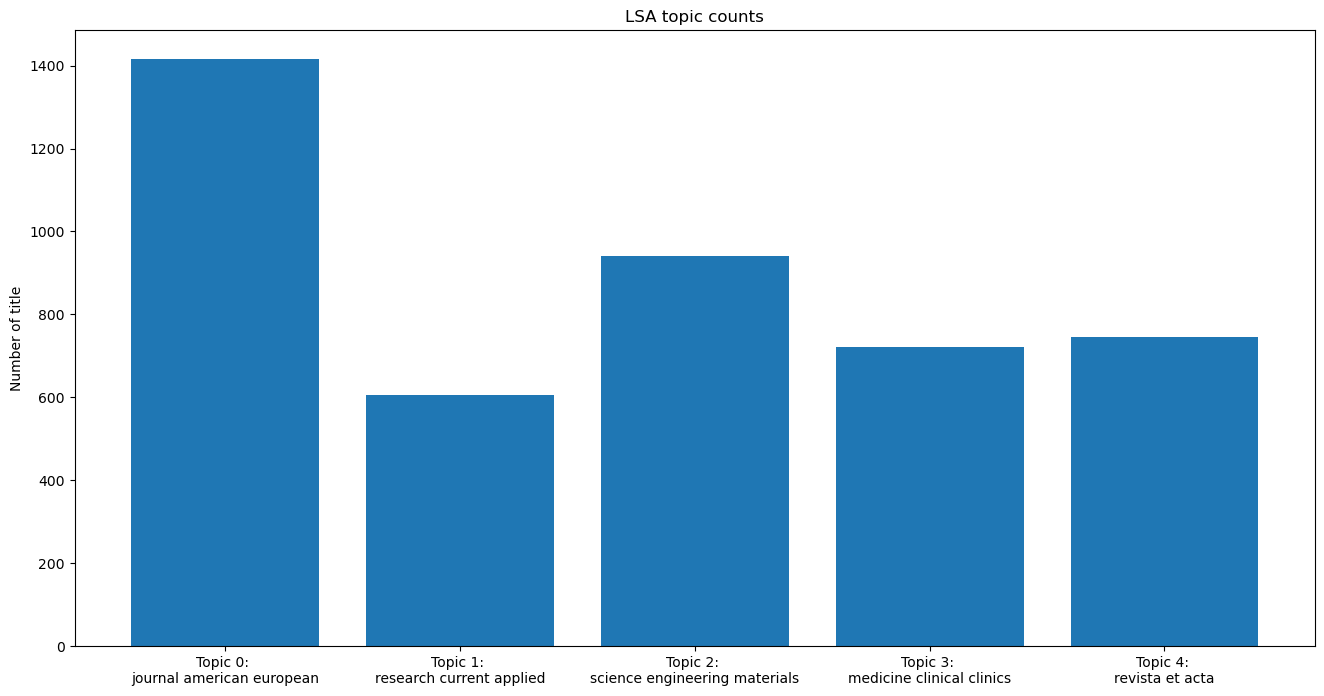

In [32]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [33]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4429 samples in 0.003s...
[t-SNE] Computed neighbors for 4429 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4429
[t-SNE] Computed conditional probabilities for sample 2000 / 4429
[t-SNE] Computed conditional probabilities for sample 3000 / 4429
[t-SNE] Computed conditional probabilities for sample 4000 / 4429
[t-SNE] Computed conditional probabilities for sample 4429 / 4429
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.147789
[t-SNE] KL divergence after 2000 iterations: 0.460508


In [34]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [35]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [36]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [37]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [38]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [39]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  clinics materials journal america north systems revue revista today reviews
Topic 2:  journal surgery american european international society emc association cancer science
Topic 3:  science journal technology health sciences applied energy physics management research
Topic 4:  journal medicine clinical engineering reports biology current molecular review research
Topic 5:  research journal revista chemistry acta english et edition advances biochimica


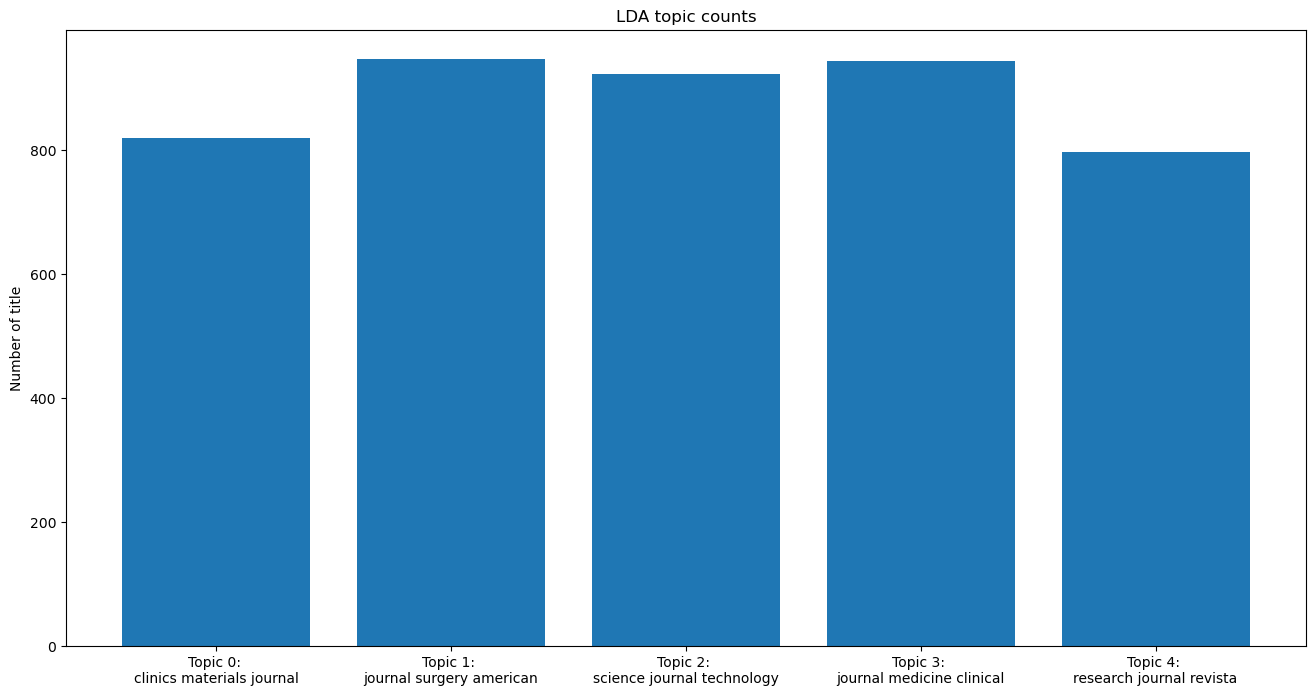

In [40]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [41]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4429 samples in 0.002s...
[t-SNE] Computed neighbors for 4429 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4429
[t-SNE] Computed conditional probabilities for sample 2000 / 4429
[t-SNE] Computed conditional probabilities for sample 3000 / 4429
[t-SNE] Computed conditional probabilities for sample 4000 / 4429
[t-SNE] Computed conditional probabilities for sample 4429 / 4429
[t-SNE] Mean sigma: 0.000015
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.539467
[t-SNE] KL divergence after 2000 iterations: 0.273260


In [42]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [43]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [44]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.001*"virusresearch" + 0.001*"vehicularcommunications" + 0.001*"thejournalofbasicandappliedzoology" + 0.001*"sustainablehorizons" + 0.001*"worldpatentinformation" + 0.001*"theknee" + 0.001*"thermalscienceandengineeringprogress" + 0.001*"thejournalofhandsurgery" + 0.001*"thebreast" + 0.001*"thejournalofmathematicalbehavior"'),
 (1,
  '0.001*"thelancetmicrobe" + 0.001*"thequarterlyreviewofeconomicsandfinance" + 0.001*"thejournaloftheamericandentalassociation" + 0.001*"thelancetchildandadolescenthealth" + 0.001*"worldjournalofotorhinolaryngologyheadandnecksurgery" + 0.001*"theleadershipquarterly" + 0.001*"techniquesandinnovationsingastrointestinalendoscopy" + 0.001*"theriogenology" + 0.001*"transportationresearchpartbmethodological" + 0.001*"trendsinmolecularmedicine"'),
 (2,
  '0.000*"structure" + 0.000*"nursingplusopen" + 0.000*"pediatricdentaljournal" + 0.000*"journalofmolecularcatalysisbenzymatic" + 0.000*"journalofcomputerlanguages" + 0.000*"nursingedespanola" + 0.000*"micro

In [45]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.136945,0.455942,0.134020,0.137506,0.135588,1
1,0.469310,0.131929,0.131698,0.134213,0.132850,0
2,0.137377,0.134672,0.454009,0.137964,0.135978,2
3,0.137313,0.134636,0.454217,0.137903,0.135932,2
4,0.136870,0.456201,0.133982,0.137419,0.135528,1


In [46]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -10.297878023406206

Coherence Score using c_v:  0.8488211254407405

Coherence Score using u_mass:  -19.248954955616547


In [47]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: 

In [49]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005742  0.009399       1        1  29.002747
3      0.003162  0.004539       2        1  18.050089
1     -0.037146 -0.008177       3        1  17.993936
4      0.022463 -0.020303       4        1  17.495104
0      0.005778  0.014543       5        1  17.458125, topic_info=                                            Term      Freq     Total Category  \
4058               theamericanjournalofpathology  1.000000  1.000000  Default   
4026                 teachingandteachereducation  1.000000  1.000000  Default   
4054     theamericanjournalofgeriatricpsychiatry  1.000000  1.000000  Default   
4175                            theocularsurface  1.000000  1.000000  Default   
4345      veterinaryimmunologyandimmunopathology  1.000000  1.000000  Default   
...                                          ...       ...       ...      ...   
4388             womensstudiesinternationalforum  0.909249  1.598315   Topic5   
4333                               valueinhealth  0.909249  1.598315   Topic5   
4269              trendsincardiovascularmedicine  0.909249  1.598315   Topic5   
4226  transactionsofthebritishmycologicalsociety  0.909248  1.598315   Topic5   
4249                      transportationresearch  0.909248  1.598315   Topic5   

      logprob  loglift  
4058  30.0000  30.0000  
4026  29.0000  29.0000  
4054  28.0000  28.0000  
4175  27.0000  27.0000  
4345  26.0000  26.0000  
...       ...      ...  
4388  -6.7448   1.1813  
4333  -6.7448   1.1813  
4269  -6.7448   1.1813  
4226  -6.7448   1.1813  
4249  -6.7448   1.1813  

[181 rows x 6 columns], token_table=      Topic      Freq  \
term                    
3956      1  0.868181   
4000      5  0.625659   
4002      3  0.650453   
4015      3  0.650453   
4018      5  0.625659   
...     ...       ...   
4398      5  0.625659   
4411      3  0.650453   
4417      5  0.625659   
4419      4  0.641257   
4420      2  0.609715   

                                                                                                                                 Term  
term                                                                                                                                   
3956                                                                                                                        structure  
4000                                                                                                              sustainablehorizons  
4002                                                                                              sustainablematerialsandtechnologies  
4015                                                                                                         systemsandcontrolletters  
4018                                                                                                       systemsengineeringprocedia  
...                                                                                                                               ...  
4398                                                                                                           worldpatentinformation  
4411  zentralblattfurbakteriologiemikrobiologieundhygiene1abtoriginaleamedizinischemikrobiologieinfektionskrankheitenundparasitologie  
4417                                                                                           zentralblattfurhygieneundumweltmedizin  
4419                                                                                                                          zeolite  
4420                                                                                        zeszytynaukowewcolettersinoncologyscience  

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 1])

In [50]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)


[(0,
  '-0.610*"structure" + -0.048*"openrespiratoryarchives" + -0.046*"futurecomputingandinformaticsjournal" + -0.041*"entertainmentcomputing" + -0.040*"clinicsinplasticsurgery" + 0.038*"mathematicalmodelling" + -0.038*"geosystemsandgeoenvironment" + -0.036*"medicineinmicroecology" + -0.035*"appliedenergy" + -0.035*"diabetesepidemiologyandmanagement"'),
 (1,
  '0.067*"isatransactions" + 0.062*"networksecurity" + 0.061*"developmentengineering" + -0.058*"plantscienceletters" + 0.055*"jognnursing" + 0.055*"geobios" + 0.051*"drugdiscoverytodaydiseasemechanisms" + -0.050*"researchinaccountingregulation" + 0.050*"pharmacologyandtherapeuticspartachemotherapytoxicologyandmetabolicinhibitors" + 0.050*"currentopinioninpsychology"'),
 (2,
  '0.062*"zentralblattfurbakteriologie1abtoriginaleamedizinischemikrobiologieinfektionskrankheitenundparasitologie" + 0.054*"nuclearanalysis" + -0.053*"aquaticprocedia" + 0.052*"internationaltransactionsinoperationalresearch" + 0.050*"graphicalmodels" + 0.050*"

In [51]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.8527088400614595

Coherence Score for LSI using u_mass:  -19.23509201200535


Compare two models

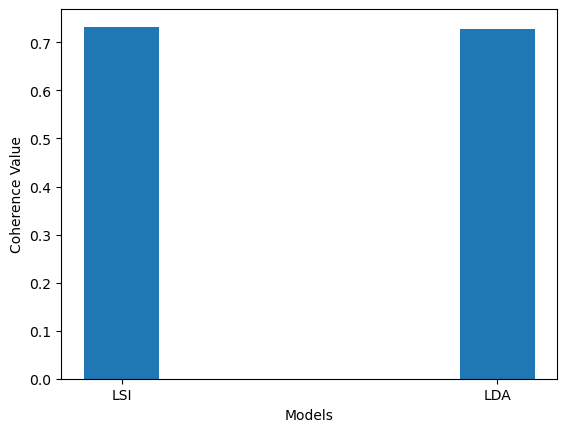

In [52]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])